In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.7.0'

In [4]:
tf.__version__

'2.7.0'

## Creating image classifier

In [5]:
# load fashion mnist dataset from https://keras.io/api/datasets/fashion_mnist/
tf.keras.datasets.fashion_mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data() #load the dataset into train and test sets

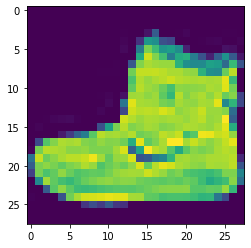

In [7]:
plt.imshow(X_train_full[0]) #plot the first img of the train dataset

In [8]:
y_train_full[1] #the variable containing classes, here 0 stands for the label of the image. So the dataset includes multiple classifiers for each object

0

In [9]:
#instead of referencing the labels each time, we can create a list of all categories to index what we want to access
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train_full[1]] #the vector of class names will match the order with the array of classes of y_train_full

'T-shirt/top'

In [11]:
X_train_full[0].shape #the predictors dataset includes an array of lists containing 28 pixels, each pixel containing a degree of color in hexadecimal notation = 0 full black and  255 full white

(28, 28)

In [12]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

### Data normalization

We then normalize the data dimensions so that they are of approximately of the same scale. In this case we will divide all pixels by 255 (absolute value for pixels). For other numerical datasets you can normalize the dimensions by z-transforming the data (take the mean out of the values).

In [13]:
X_train_norm = X_train_full / 255. #remember to include . after 255 to get a float output
X_test_norm = X_test / 255.

In [14]:
X_test_norm[0] # inspect transformed data for the first image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

#### Split the data into train/validation/test sets

We have 60,000 datasets for training and 10,000 datasets for test. Now we **further split the training data into train/validation**. Here is how each type of dataset is used in deep learning.

* **Train set** = used to train the model
* **Validation set** = used for tuning the hyperparameters and evaluate model performance
* **Test set** = used to test the model after the model has gone through training and validation set

In [45]:
X_valid, X_train = X_train_norm[:5000], X_train_norm[5000:] #predictors set train
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] #response (classes) set train
X_test = X_test_norm #predictors set test

## Create the neural network model architecture

There are two APIs for defining a model in Keras:

* Sequential model API (sequential layers where the ouput of each perceptron is the input of the next layer)
* Functional API (layer network but the output layer will receive inputs from previous perceptron layers and of the input layer)

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

#### For our problem of MNIST fashion classification:

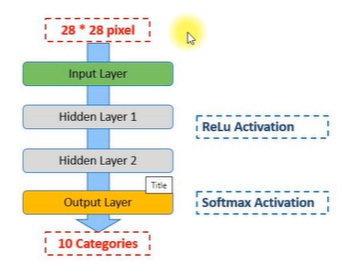

In [17]:
#creating the ANN model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #input layer; .flatten convert the 2d array into one dimensional 784 (28x28) array
model.add(keras.layers.Dense(300, activation = "relu")) #first hidden layer; 300 = number of perceptrons; activation function relu = next layer input equal to ouput for all positive values
model.add(keras.layers.Dense(100, activation = "relu")) #second hidden layer 
model.add(keras.layers.Dense(10, activation = "softmax")) #10 is the number of classes to predict, therefore 10 neurons; softmax activation function = equates the sum of all class probability to one

In [18]:
model.summary() #see model summary

#parameters are the number of input * weights + bias_n_neurons for each layer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
import pydot
keras.utils.plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [23]:
#access the parameters using get_weight() method
#remember that initial weights are random
weights, biases = model.layers[1].get_weights()

In [24]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [25]:
weights.shape #784 rows (inputs), 300 columns (weights). 

(784, 300)

In [26]:
biases #biases initiate at 0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [27]:
biases.shape #bias for each number of neurons 

(300,)

#### Compile and training the neural network model

In [37]:
?model.compile

In [41]:
#compile the model
model.compile(optimizer = "sgd",  #stochastic gradient descent - backpropagation
              loss = "sparse_categorical_crossentropy", 
              metrics = ["accuracy"])

In [53]:
 #epoch is the number of iterations for each batch of the training set
model_history = model.fit(X_train, y_train, epochs = 30,
                         validation_data = (X_valid, y_valid)) 

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2207 - accuracy: 0.9201 - val_loss: 0.2893 - val_accuracy: 0.8942
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2174 - accuracy: 0.9221 - val_loss: 0.2906 - val_accuracy: 0.8968
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2139 - accuracy: 0.9227 - val_loss: 0.3970 - val_accuracy: 0.8568
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2106 - accuracy: 0.9247 - val_loss: 0.2921 - val_accuracy: 0.8966
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2086 - accuracy: 0.9242 - val_loss: 0.2812 - val_accuracy: 0.8990
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2030 - accuracy: 0.9274 - val_loss: 0.3002 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2005 - accuracy: 0.9289 - val_loss: 0.2933 - val_accuracy:

**Naturally the accuracy of the model is lower in the first epochs since it is finding iteratively the best weights and biases parameters estimates**

In [54]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
model_history.history #access the loss, acc, val_loss and val_acc in the form of a dictionary

In [50]:
model_history.history["loss"] #you can acess diff parameters with its key

[0.7236780524253845,
 0.4843233525753021,
 0.43925395607948303,
 0.41249433159828186,
 0.39395850896835327,
 0.37522026896476746,
 0.36334460973739624,
 0.35189977288246155,
 0.3415890038013458,
 0.33219200372695923,
 0.32431620359420776,
 0.31506234407424927,
 0.30816128849983215,
 0.3023137152194977,
 0.29484379291534424,
 0.289277583360672,
 0.2841065526008606,
 0.277920126914978,
 0.27297961711883545,
 0.26764771342277527,
 0.26259559392929077,
 0.2577607333660126,
 0.253675252199173,
 0.24865274131298065,
 0.24440625309944153,
 0.24075055122375488,
 0.23647968471050262,
 0.23291146755218506,
 0.22853097319602966,
 0.22528870403766632]

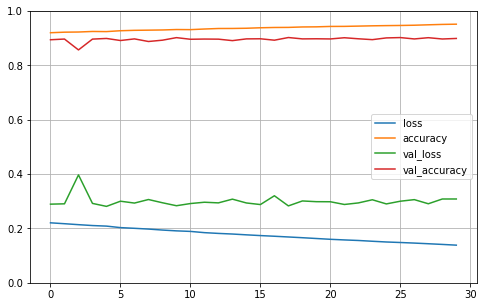

In [55]:
#plot the parameter estimates for loss and accuracy
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

**Note that the model did still not converge between the train and validation sets, each line for loss and acc are going down for training, and lines are going up for validation set. See the wigglyng of the accuracy lines because it is using the gradient descent method. Then you should try to run the model with more epochs until the lines of train and validation sets converge.**

**If you run the model again, keras will begin the model fitting where it stopped from the previous model fit**

#### Evaluate performance and make predictions

In [56]:
#evaluate the performance on the test set
model.evaluate(X_test, y_test) #the ouput is loss and accuracy

313/313 [==============================] - 1s 2ms/step - loss: 0.3468 - accuracy: 0.8892


[0.34677785634994507, 0.88919997215271]

In [57]:
#predict the probabilities and classes on new unseen data
X_new = X_test[:3] #since we do not have more data, we can get a subsample of the test set

In [59]:
X_new.shape

(3, 28, 28)

In [71]:
#predict the probabilities of each class
y_prob = model.predict(X_new)
y_prob.round(2) #the ouput is 3 rows and 10 columns/classes (X_new data shape), and you get the probability for each class

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.98, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [76]:
#predict the class itself
y_pred = np.argmax(model.predict(X_new), axis = 1)
y_pred #the ouput is an array with the three predict classes 

array([9, 2, 1], dtype=int64)

In [77]:
np.array(class_names)[y_pred] #get the name of the labels

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


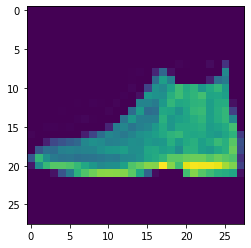

In [80]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


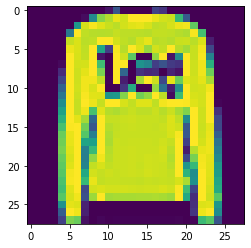

In [81]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


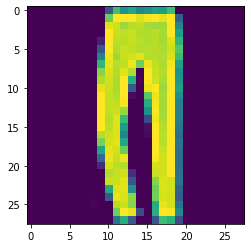

In [82]:
print(plt.imshow(X_test[2]))